# Современные методы анализа данных и машинного обучения, БИ

## НИУ ВШЭ, 2024-25 учебный год

### Домашнее задание №4. Математическая оптимизация

Задание выполнил(а):

        Наливайченко Дарья


### Общая информация

__Дата выдачи:__ 30.04.2025

__Дедлайн:__ 04:00 15.05.2025

### Оценивание и штрафы

Количество баллов за каждую задачу данного домашнего задания указано рядом с условием задачи.

Оценка за домашнее задание вычисляется по следующей формуле:

$$
s \times 10/34 ,
$$

где $s$  — количество баллов, которое вы набрали в сумме по всем задачам.

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 **вторичный** балл в день, но  задержка не может быть больше недели.

**Важно:** В этом домашнем задании предусмотрено несколько заданий, за которые можно получить бонусные баллы. Бонусные баллы прибавляются к обычным баллам, и может выйти так, что ваша итоговая оценка станет больше 10. В таком случае именно это и будет являться вашей оценкой. То есть за это ДЗ **можно** получить больше 10

__Внимание!__ Домашнее задание выполняется самостоятельно. Не допускается помощь в решении домашнего задания от однокурсников или третьих лиц. «Похожие» решения считаются плагиатом, и все задействованные студенты — в том числе и те, у кого списали, — не могут получить за него больше 0 баллов.

Использование в решении домашнего задания генеративных моделей (ChatGPT и так далее) допускается исключительно в рамках справочной и образовательной информации. Любые другие случаи применения средств ИИ — например, для автоматической генерации кода по заданию — считаются плагиатом, и такое домашнее задание оценивается в 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/). Необходимо загружать файл с расширением .ipynb (питоновский ноутбук)

Инвайт для подключения к странице курса в системе — указан для каждой группы в нашем телеграмм-канале.

### О задании

В данном задании мы потренируемся в работе с математическим анализом и методами математической оптимизации, чёткое понимание которых совершенно необходимо в рамках любой задачи и для любой модели в машинном обучении.

В первой части задания мы будем с вами работать со следующей функцией:

$$y(x) = x^{3} \ln(x)$$

### Задание 1


#### 1.1. (1 балл)

Посчитайте производную данной функции аналитически. Для этого либо воспользуйтесь листком бумаги и прикрепите сюда фотографию, либо используйте язык разметки LaTeX — он поддерживается в юпитеровских ноутбуках.

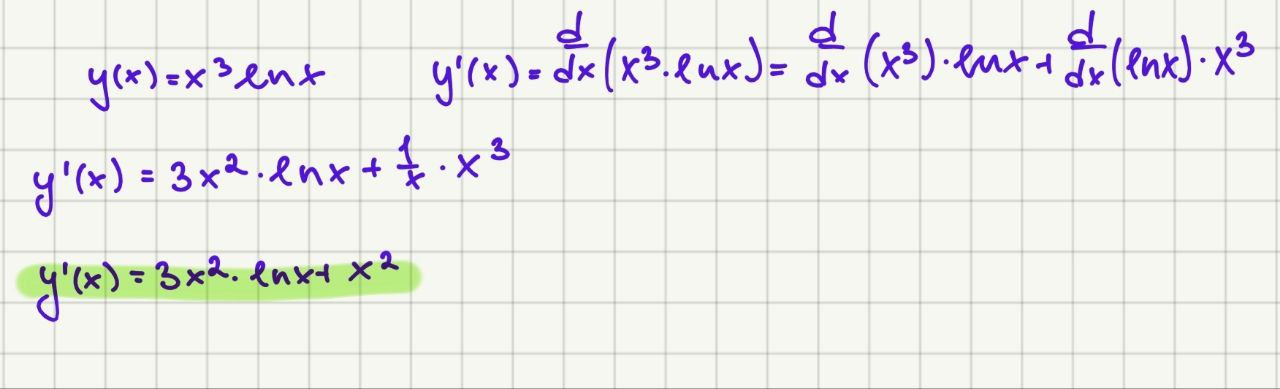

#### 1.2. (2 балла)

Напишите программную функцию `f(x)`, которая бы вычисляла значение нашей функции в точке и возвращала бы это значение в качестве ответа; и напишите программную функцию `df(x)`, которая бы вычисляла значение производной нашей функции в точке и возвращала бы это значение в качестве ответа.

Обязательно сделайте проверку всех функций на какой-нибудь конкретной точке. Убедитесь, что ответы вашего предыдущего пункта (на листочке) и программного в этом плане полностью совпадают.

In [2]:
import numpy as np

def f(x):
  return x**3 * np.log(x)

def d(x):
  return 3 * x**2 * np.log(x) + x**3 / x #записываем производную данной нам функции

x = float(input("Введите x: ")) #чтобы ответ не был привязан к одной определенной точке, даем возможность ввести любую (какая покажется более привлекательной)

print("f(x0) = " , f(x)) #смотрим значение самой функции в выбраной точке и производной
print("d(x0) = ", d(x))


Введите x: 3
f(x0) =  29.662531794038966
d(x0) =  38.66253179403897


#### 1.3. (2 балла)

Визуализируйте нашу функцию (постройте график).

<ipython-input-2-429e9bfbb53d>:4: RuntimeWarning: divide by zero encountered in log
  return x**3 * np.log(x)
<ipython-input-2-429e9bfbb53d>:4: RuntimeWarning: invalid value encountered in multiply
  return x**3 * np.log(x)
<ipython-input-2-429e9bfbb53d>:7: RuntimeWarning: divide by zero encountered in log
  return 3 * x**2 * np.log(x) + x**3 / x
<ipython-input-2-429e9bfbb53d>:7: RuntimeWarning: invalid value encountered in multiply
  return 3 * x**2 * np.log(x) + x**3 / x
<ipython-input-2-429e9bfbb53d>:7: RuntimeWarning: invalid value encountered in divide
  return 3 * x**2 * np.log(x) + x**3 / x


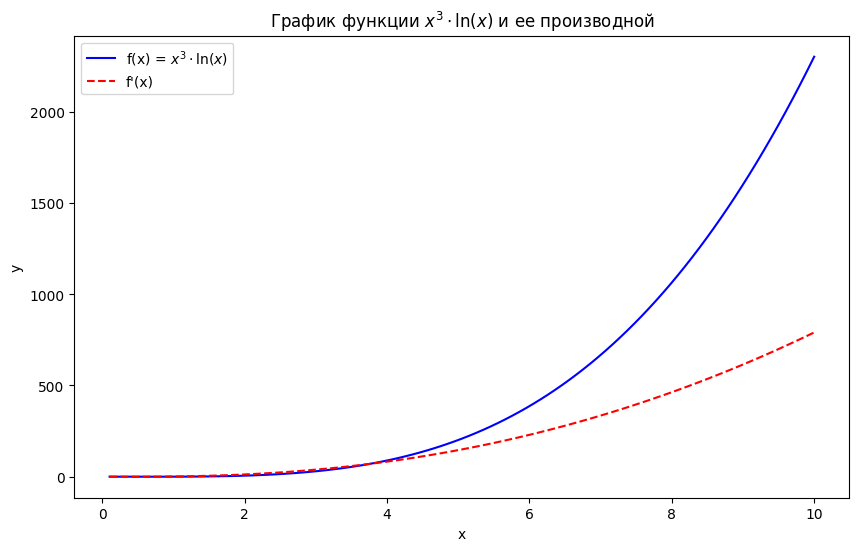

In [3]:
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 100)
y = f(x)
dy = d(x)
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="f(x) = $x^3 \cdot \ln(x)$", color='blue')
plt.plot(x, dy, label="f'(x)", color='red', linestyle='--')

plt.xlabel('x')
plt.ylabel('y')
plt.title('График функции $x^3 \cdot \ln(x)$ и ее производной')
plt.legend()
plt.show()

### Задание 2

#### 2.1. (4 балла)

Реализуйте функцию `get_min_with_gd`, которая принимает на вход начальную точку $x_0$, число шагов, `lr` и `threshold`; внутри себя производит поиск минимума при помощи градиентного спуска; и возвращает последовательность точек, полученных на каждом шаге.

In [11]:
def get_min_with_gd(x0, l, lr, thershold):
    x_0 = [x0]
    x = x0
    for i in range (l):
      grad = d(x) #для градиента используем производную функции
      x = x - lr * grad
      x_0.append(x)
    return x_0

#### 2.2. (2 балла)

Запустите поиск минимума с нескольких любых точек (не менее 3).

Проверьте, что все работает ожидаемым образом, отрисовав график изменения координаты точки, в зависимости от итерации градиентного спуска, для каждого запуска.

2 3 4


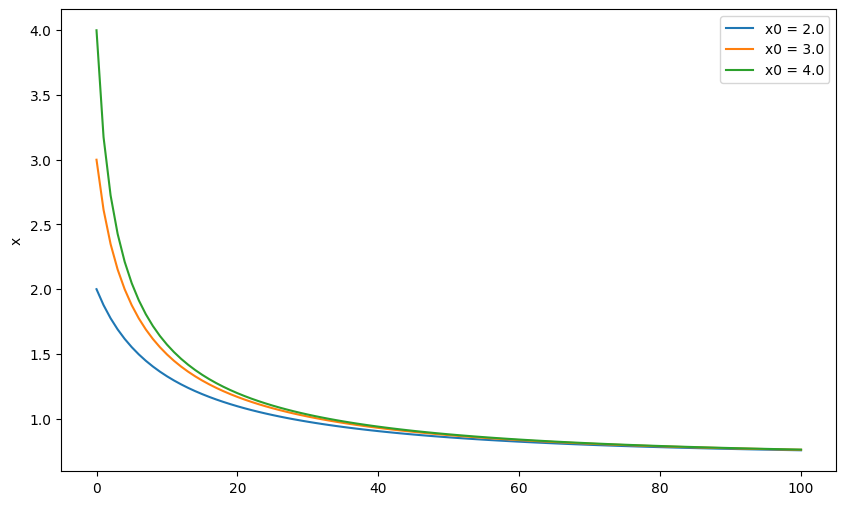

In [12]:
x0_values = list(map(float, input().split())) #опять-таки, чтобы результаты данных не были привязаны к определенным точкам, даем возмоность вводить их

result = []
for x0 in x0_values:
    g = get_min_with_gd(x0, l=100, lr=0.01, thershold=1e-6)
    result.append(g)

plt.figure(figsize=(10, 6))
for g in result:
    plt.plot([i for i in range(len(g))], g, label=f'x0 = {g[0]}')
    plt.ylabel('x')
    plt.legend()
plt.show()

#### 2.3. (3 балла)

Отрисуйте график самой функции еще раз. На данный график нанесите движение алгоритма от исходных точек к финальной точке разными цветами. Нанесите на график истинный минимум отдельной точкой и подпишите его (в виде текста на графике).

2 3 4


<ipython-input-2-429e9bfbb53d>:7: RuntimeWarning: invalid value encountered in log
  return 3 * x**2 * np.log(x) + x**3 / x
<ipython-input-2-429e9bfbb53d>:4: RuntimeWarning: invalid value encountered in log
  return x**3 * np.log(x)


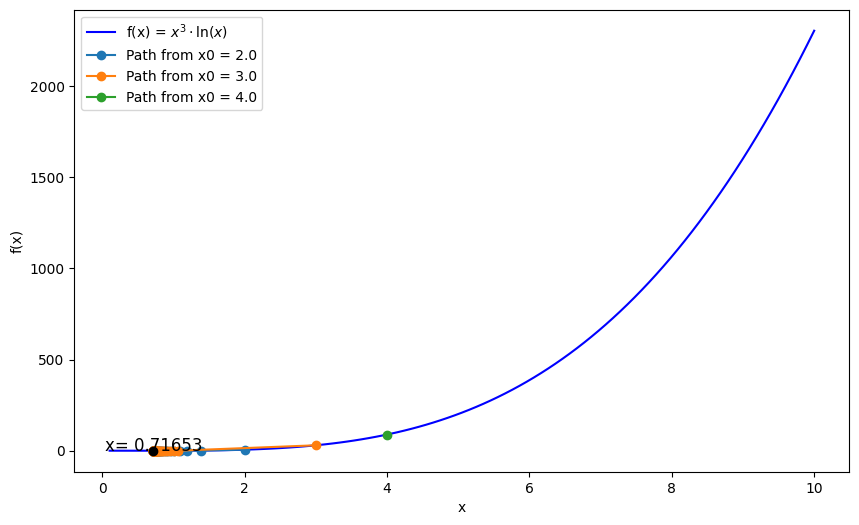

In [6]:
true_min = np.exp(-1/3) # нашли локальный минимум , приравняв произвожную к нулю
#x0_values = [0.5, 1.2, 1.8]
min_value = f(true_min)
x0_values = list(map(float, input().split()))
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="f(x) = $x^3 \\cdot \\ln(x)$", color='blue')

for x0 in x0_values:
    path = get_min_with_gd(x0, l=130, lr=0.05, thershold=1e-4) #строим траекторию градиентного спуска
    plt.plot(path, f(np.array(path)), marker='o', label=f"Path from x0 = {x0}")


plt.scatter(true_min, min_value, color='black', zorder = 7)
plt.text(true_min, min_value, "x= {:.5f}".format(true_min), fontsize=12, ha='center')


plt.xlabel('x')
plt.ylabel('f(x)')

plt.legend()
plt.show()


### Задание 3

Начиная с задания 3, мы будем работать с другими функциями.

Пусть

$$f = \log((e^x + e^{-2x}) \cdot(e^{y + 1} + 0.5\cdot e ^{-y}))$$

#### 3.1. (1 балл и 2 бонусных балла)

Верно ли, что $f$ имеет единственную точку локального минимума, причем этот локальный минимум также является и глобальным? Почему да или почему нет? Докажите ваш ответ!

*Примечание. В данном задании графическое доказательство оценивается в 1 балл; строгое математическое доказательство оценивается в 2 бонусных балла.*

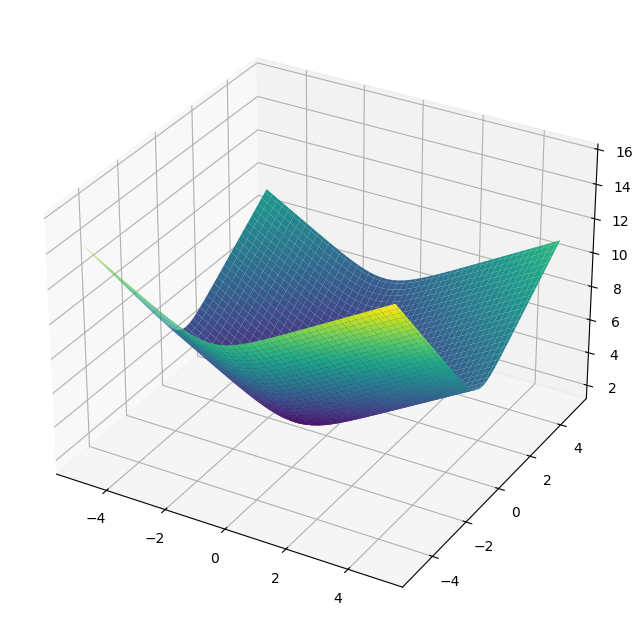

In [7]:
from mpl_toolkits.mplot3d import Axes3D

def f(x, y):
    return np.log((np.exp(x) + np.exp(-2 * x)) * (np.exp(y + 1) + 0.5 * np.exp(-y)))

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Y, X, Z, cmap='viridis')

на данном графике можно четко увидеть, что у функции есть единственная точка минимума. от данной точки значения только "разрастаются". на данном графике функция представлена , будто бы "чаша", на дне которой и находиться глобальный минимум

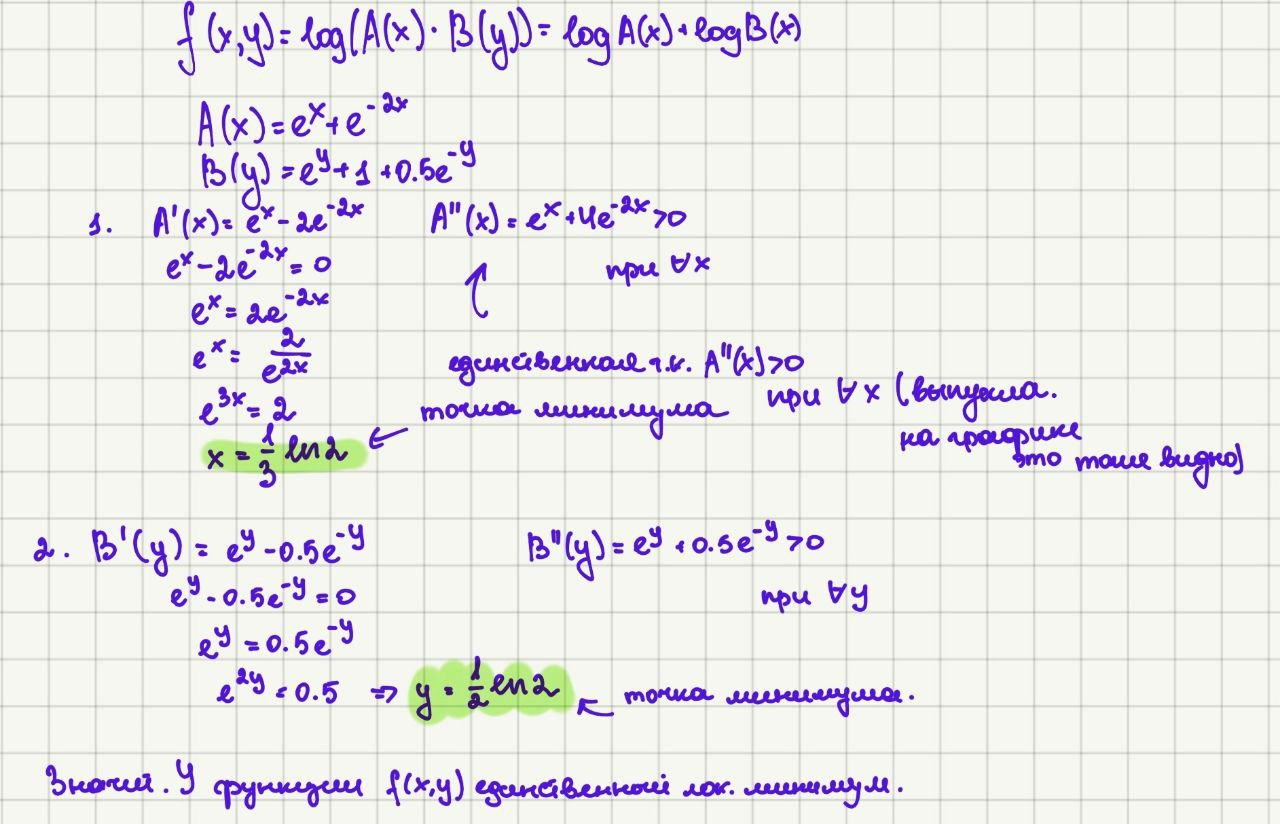

#### 3.2. (3 балла и 2 бонусных балла)

Придумайте какие-нибудь функции $g$ и $h$ от двух переменных, такие что
- функция $g$ не имеет глобального минимума (не ограничена снизу);
- функция $h$ имеет по крайней мере два локальных минимума, неравных друг другу.

Докажите, что ваши функции удовлетворяют заявленным критериям.

*Примечание. В данном задании графическое доказательство оценивается в рамках основных баллов; строгое математическое доказательство оценивается в 2 бонусных балла.*

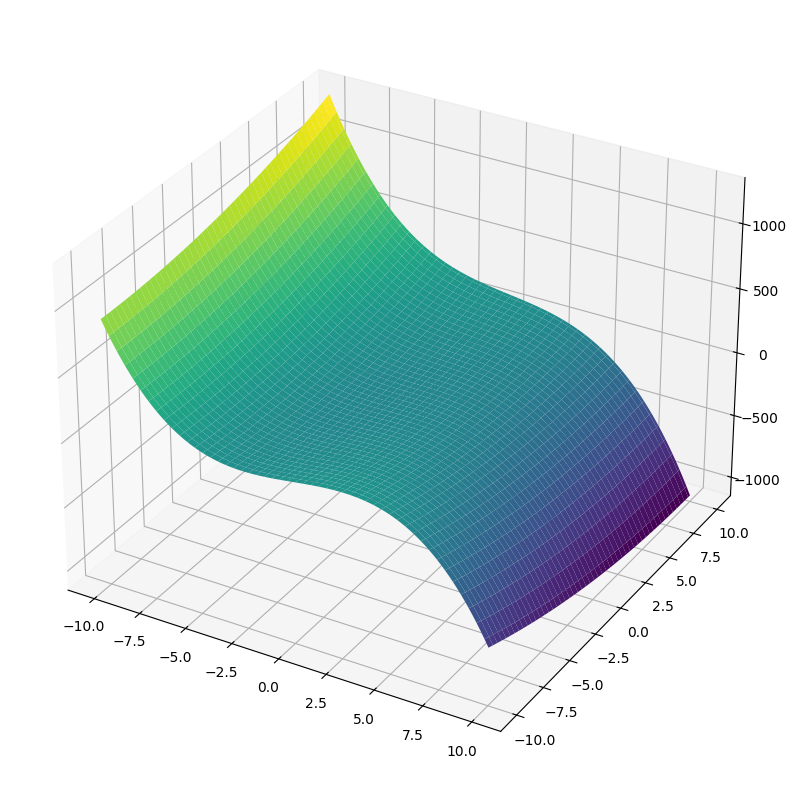

In [8]:
#g = x**2 - y **3

def g(x, y):
    return x**2 - 2*x*y- y **3
def h(x, y):
    return (x-1)**2+(y-2)**2+np.sin(3*x)*np.cos(5*y)

g_x = np.linspace(-10, 10, 100)
g_y = np.linspace(-10, 10, 100)
g_X, g_Y = np.meshgrid(g_x, g_y)
g_Z = g(g_X, g_Y)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(g_Y, g_X, g_Z, cmap='viridis') #на графике видно, что функция "уходит" вниз бесконечно. то есть не имя точки, которая станет минимумом
#данная функция не ограничена снизу, значит, не имеют локального (и глобального минимума)

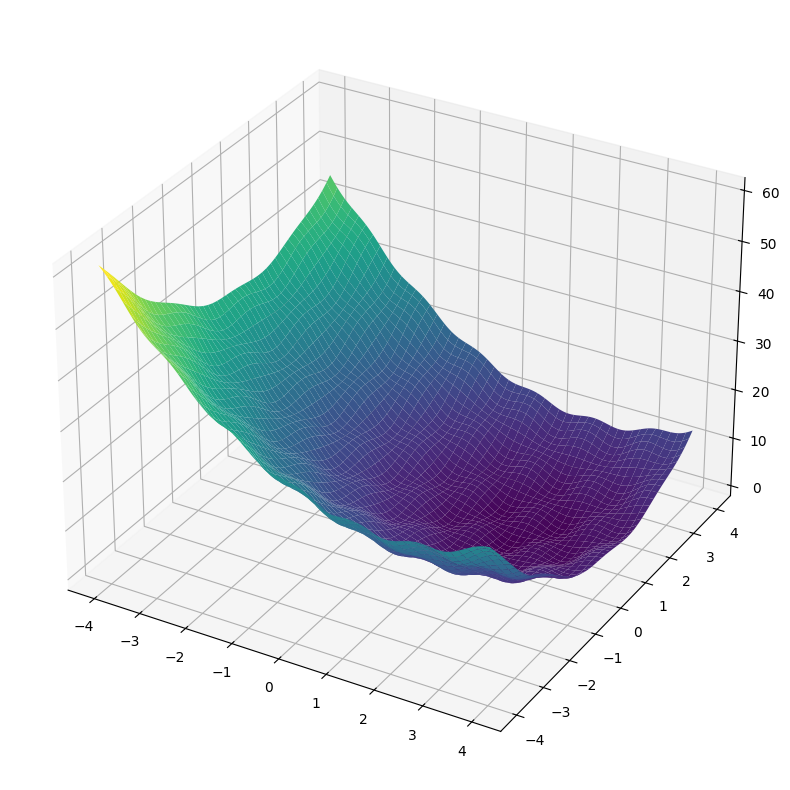

In [10]:
h_x = np.linspace(-4, 4, 400)
h_y = np.linspace(-4, 4, 400)
h_X, h_Y = np.meshgrid(h_x, h_y)
h_Z = h(h_X, h_Y)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(h_Y, h_X, h_Z, cmap='viridis') #конечно, на графике не так очевидно, однако позже рассмотрено в мат. обоснование, почему данная функция имеет несколько минимумов
#не равных друг другу. однако даже на графике видно, что функция имеет несколько "ямок", в которых находятся минимумы. данные ямки имеют место на этом графике из-за того,
#что в функции присутствуют sin(x) и cos(y) (c коэффициентами соответственно).  они создают "колебания" и ямки на графике

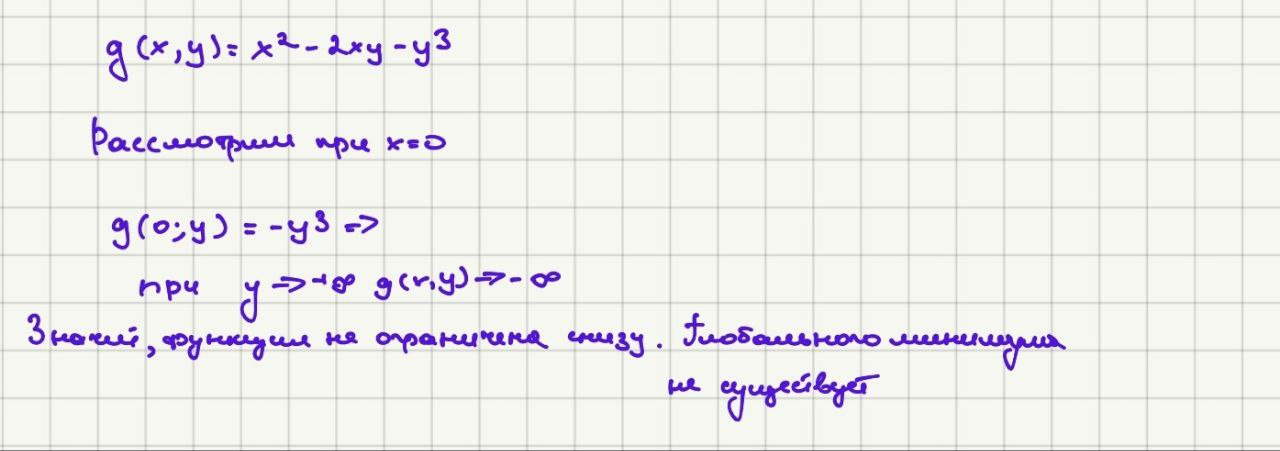

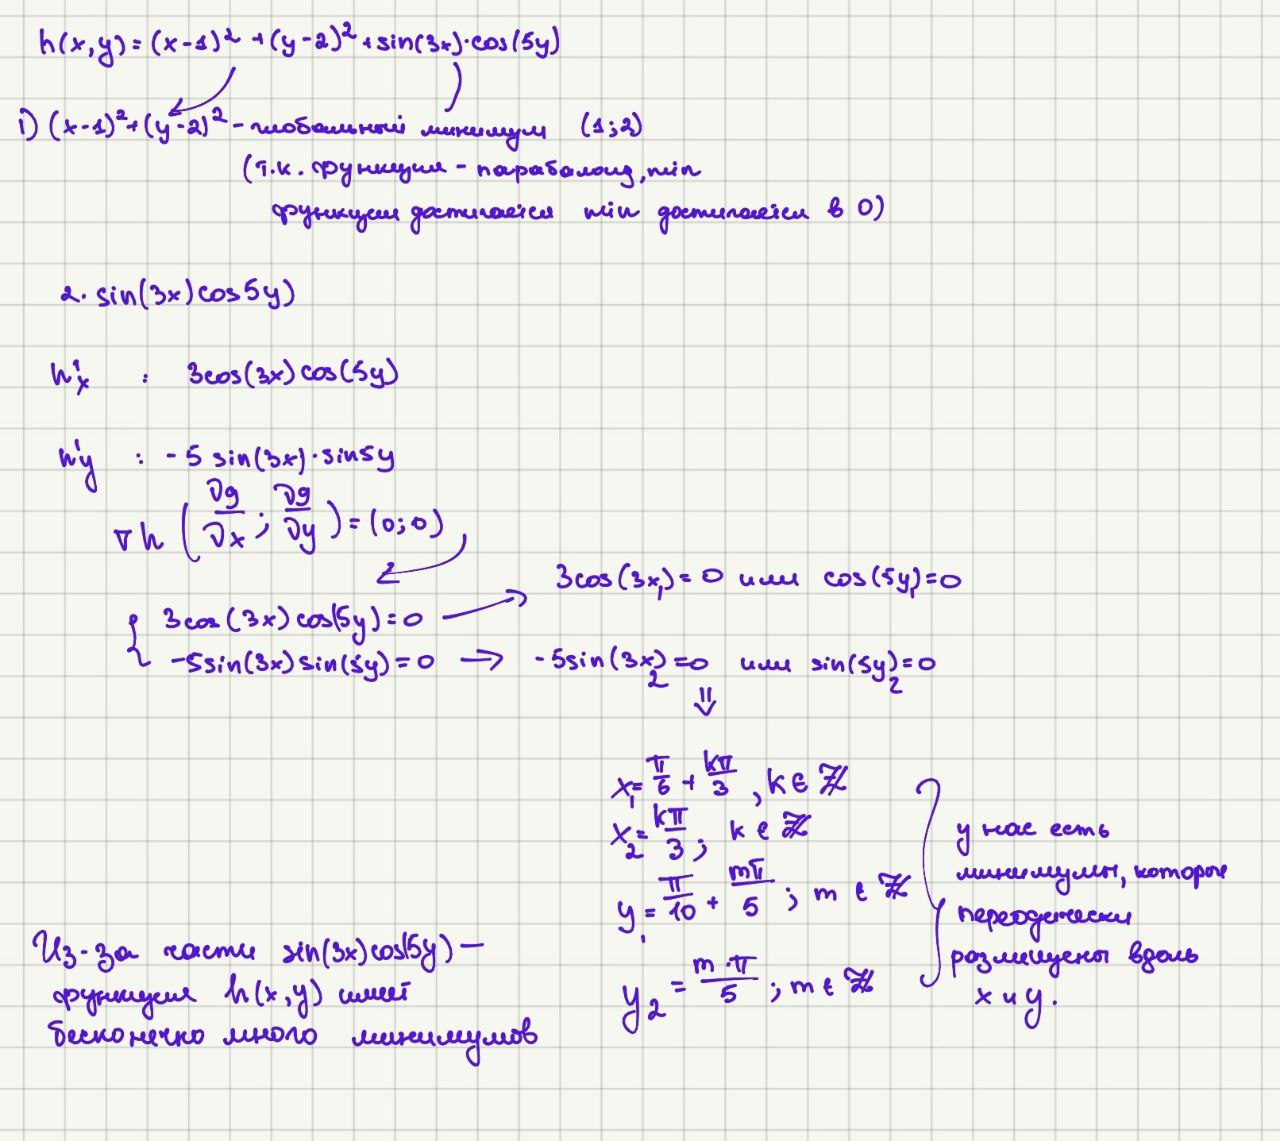

#### 3.3. (5 баллов)

Реализуйте функцию `get_min_with_rmsprop`, которая принимает на вход начальную точку $x_0$, число шагов, `lr`, `beta` и `threshold`; внутри себя производит поиск минимума при помощи градиентного спуска с модификацией RMSProp; и возвращает последовательность точек, полученных на каждом шаге.

Напомним, как выглядят формулы для этого алгоритма:

$$g^{n+1} = ∇f(w^{n})$$
$$\gamma^{n+1} = (1 - \beta) \gamma^{n} + \beta (g^{n+1}) ^ 2$$
$$w^{n+1} = w^n - \frac{\alpha}{\sqrt{\gamma^{n+1} + ɛ}}⋅g^{n+1}$$

Здесь $α$ — learning rate, $ɛ$ — малое число (можно взять 0.0001 — оно нужно, чтобы случайно не было деления на 0), $\beta$ — мера учета инерции.



In [53]:
def get_min_with_rmsprop(grad, x0, l, lr, beta, threshold):
    x = np.array(x0, dtype=np.float64)
    gamma = np.zeros_like(x)
    result = [x.copy()]

    for i in range(l):
        g = grad(x)
        gamma = (1 - beta) * gamma + beta * g**2
        x = x - lr * g / (np.sqrt(gamma) + 1e+4)
        result.append(x.copy())

    return np.array(result)


#### 3.4. (4 балла)

Запустите поиск минимума для всех трёх функций ($f$, $g$, $h$) с нескольких любых точек (не менее 3 — таким образом, минимум 9 запусков).

Проверьте, что все работает ожидаемым образом, отрисовав для каждого запуска график изменения координат точки (2D-график) по мере прохождения градиентного спуска. Все графики строятся на трёх парах осей, размещенных вертикально на одном полотне (свои оси для каждой функции; разные запуски для одной функции изображаются на одних осях).

In [48]:
def grad_g(xy): #для градиентов находим производные всех функций
  x, y = xy
  return np.array ([2*x - 2*y, -2*x - 3*y**2])

def grad_h(xy):
    x, y = xy
    dx = 2 * (x - 1) + 3 * np.cos(3 * x) * np.sin(3 * y)
    dy = 2 * (y - 2) + 3 * np.cos(3 * y) * np.sin(3 * x)
    return np.array([dx, dy])


def grad_f (xy):
    x, y = xy

    dx = (np.exp(x) - 2 * np.exp(-2*x)) / (np.exp(x) + np.exp(-2*x))
    dy = (np.exp(y+1) - 0.5 * np.exp(-y)) / (np.exp(y+1) + 0.5 * np.exp(-y))
    return np.array([dx, dy])

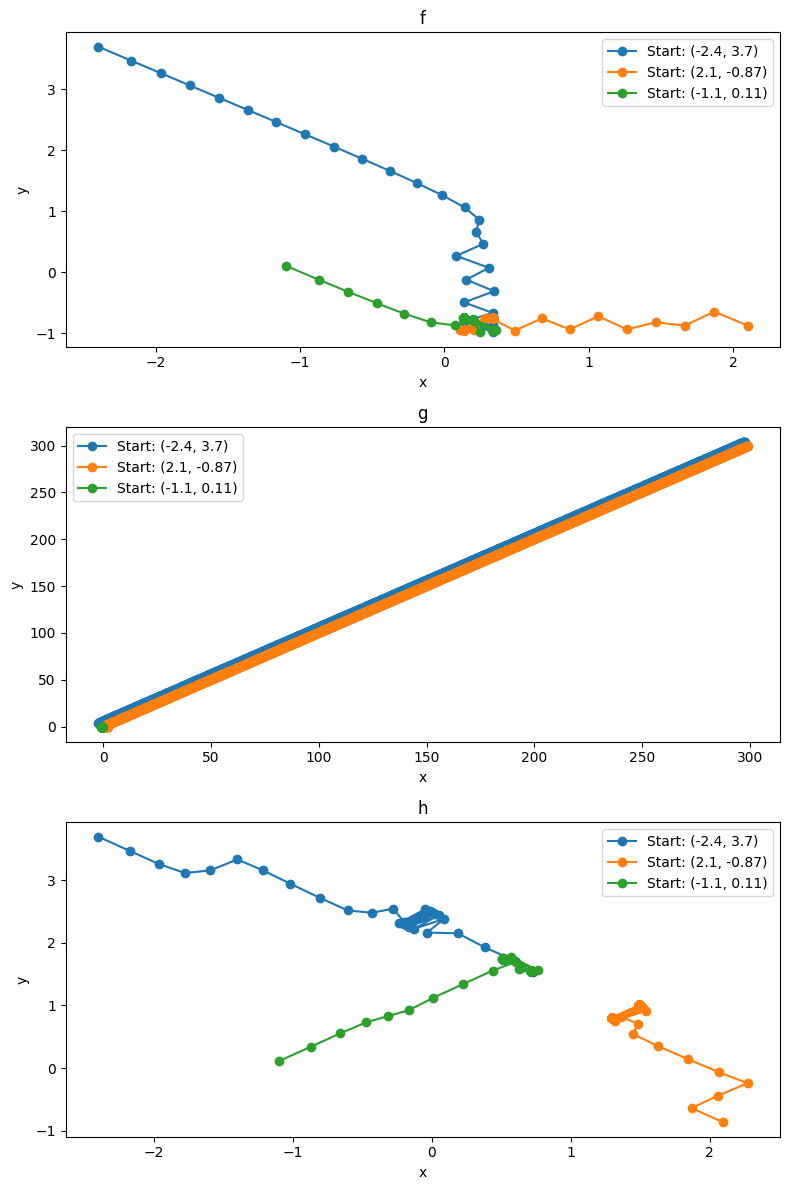

In [49]:
values = [(-2.4, 3.7), (2.1, -0.87), (-1.1, 0.11)]
grads = [grad_f, grad_g, grad_h]
title = ['f', 'g', 'h']

l = 1500
lr = 0.2
beta = 0.76
threshold = 1e-5

fig, axes = plt.subplots(3, 1, figsize=(8, 12))
for i, (grad, title) in enumerate(zip(grads, title)):
    ax = axes[i]
    for x0 in values:
        result = get_min_with_rmsprop(grad, x0, l, lr, beta, threshold) #строим траекторию градиентного спуска
        ax.plot(result[:, 0], result[:, 1], marker='o', label=f'Start: {x0}')
    ax.set_title(title)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend()
plt.tight_layout()
plt.show()

#### 3.5. (3 балла)

Отрисуйте графики самих функций еще раз. На данные графики нанесите движение алгоритма от исходных точек к финальной точке разными цветами. Там, где они есть у функции, нанесите на графики истинные локальные минимумы функций в виде отдельных точек, а также подпишите их в виде текста на графике. Все графики строятся на трёх множествах осей, размещенных вертикально на одном полотне — свои оси для каждой функции.

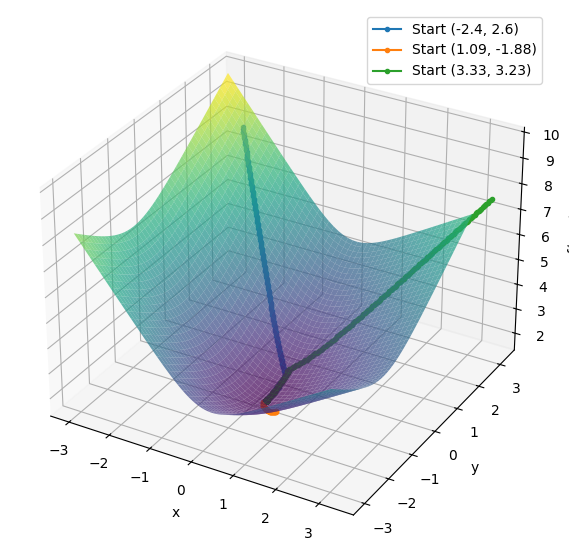

In [50]:
start = [(-2.4, 2.6), (1.09, -1.88), (3.33, 3.23)] #функция g в данном задание не рассматривается, так как (как было сказано ранее) у нее нет минимума

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

x_f = np.linspace(-3, 3, 200)
y_f = np.linspace(-3, 3, 200)
x_f, y_f = np.meshgrid(x_f, y_f)
z_f = f(x_f, y_f)

ax.plot_surface(x_f, y_f, z_f, cmap='viridis', alpha=0.7)

l = 1000
lr = 0.02
beta = 0.76
threshold = 1e-4

for i in start:
    res = get_min_with_rmsprop(grad_f, i, l, lr, beta, threshold) #строим траекторию градиентного спуска
    z_res = f(res[:, 0], res[:, 1])
    ax.plot(res[:, 0], res[:, 1], z_res, marker='o', label=f'Start {i}', markersize=3)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.legend()

plt.show()


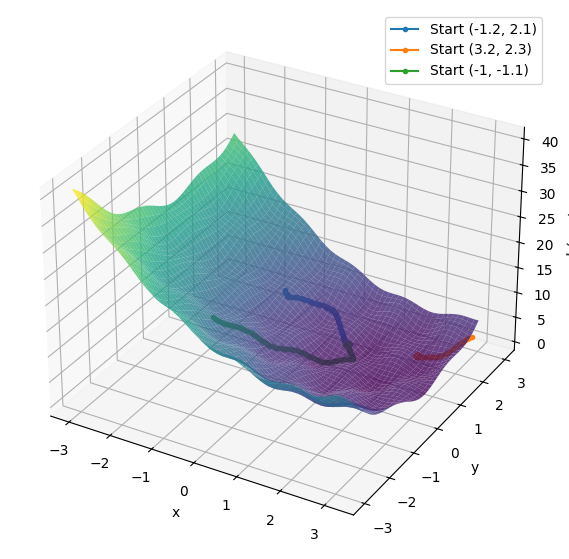

In [51]:
start = [(-1.2, 2.1), (3.2, 2.3), (-1, -1.1)]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

x_h = np.linspace(-3, 3, 300)
y_h = np.linspace(-3, 3, 300)
x_h, y_h = np.meshgrid(x_h, y_h)
z_h = h(x_h, y_h)

ax.plot_surface(y_h, x_h, z_h, cmap='viridis', alpha=0.8)

l = 1000
lr = 0.03
beta = 0.7
threshold = 1e-6

for i in start:
    res = get_min_with_rmsprop(grad_h, i, l, lr, beta, threshold)
    xxx = np.take(res, 0, axis=1)
    yyy = np.take(res, 1, axis=1)
    z_res = h(xxx, yyy)
    ax.plot(xxx, yyy, z_res, marker='o', label=f'Start {i}', markersize=3)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('h(x, y)')
ax.legend()

plt.show() #глядя на графики видно, что вводимые координаты "стремятся" к минимуму. в данной функции одним из локальных минимумов принимается точка с координатами (1,2)
#в доказательстве было показано, что данная точка считается одним из локальных минимумов для функции (при данных координатах части с sin и cos не принимают
# значение 0, однако они достаточно малы)

### Задание 4

#### Масштабирование на многомерный случай (4 балла)

Удостоверьтесь в том, что ваша функция `get_min_with_rmsprop` из прошлого задания работает не только с функциями от двух переменных, но и с функциями от произвольного числа переменных. При необходимости внесите в функцию корректировки ниже.

Придумайте любую функцию от 5 переменных, у которой есть какой-нибудь минимум (например, самое простое, точка $(0, 0, 0, 0, 0)$) и запустите градиентный спуск с RMSProp для этой функции. Проверьте, что градиентный спуск действительно сходится в правильную точку экстремума.

In [52]:
def check_5(x):
  return x[0]+x[1]**2+7*x[2]**2+6*x[3]**2+5*x[4]**2 #записываем через одну переменную, так как для функции спуска нужен вектор значений

def grad_check_5(x):
  return np.array (1+2*x[1]+14*x[2]+12*x[3]+10*x[4])

values = [0, 0, 0, 0, 0]
a = get_min_with_rmsprop(grad_check_5, values, l=1000, lr=0.05, beta=0.92, threshold=1e-4)

res = a[len(a)-1]

print (res)

#вроде как построенная мной функция градиентного спуска нормально работает для пяти переменных))



[-0.00131842 -0.00131842 -0.00131842 -0.00131842 -0.00131842]
